## Overall variance

Words with the highest overall variance in the smoothed time series data. Captures words that dramatically increase, decrease, spike, or fluctuate:

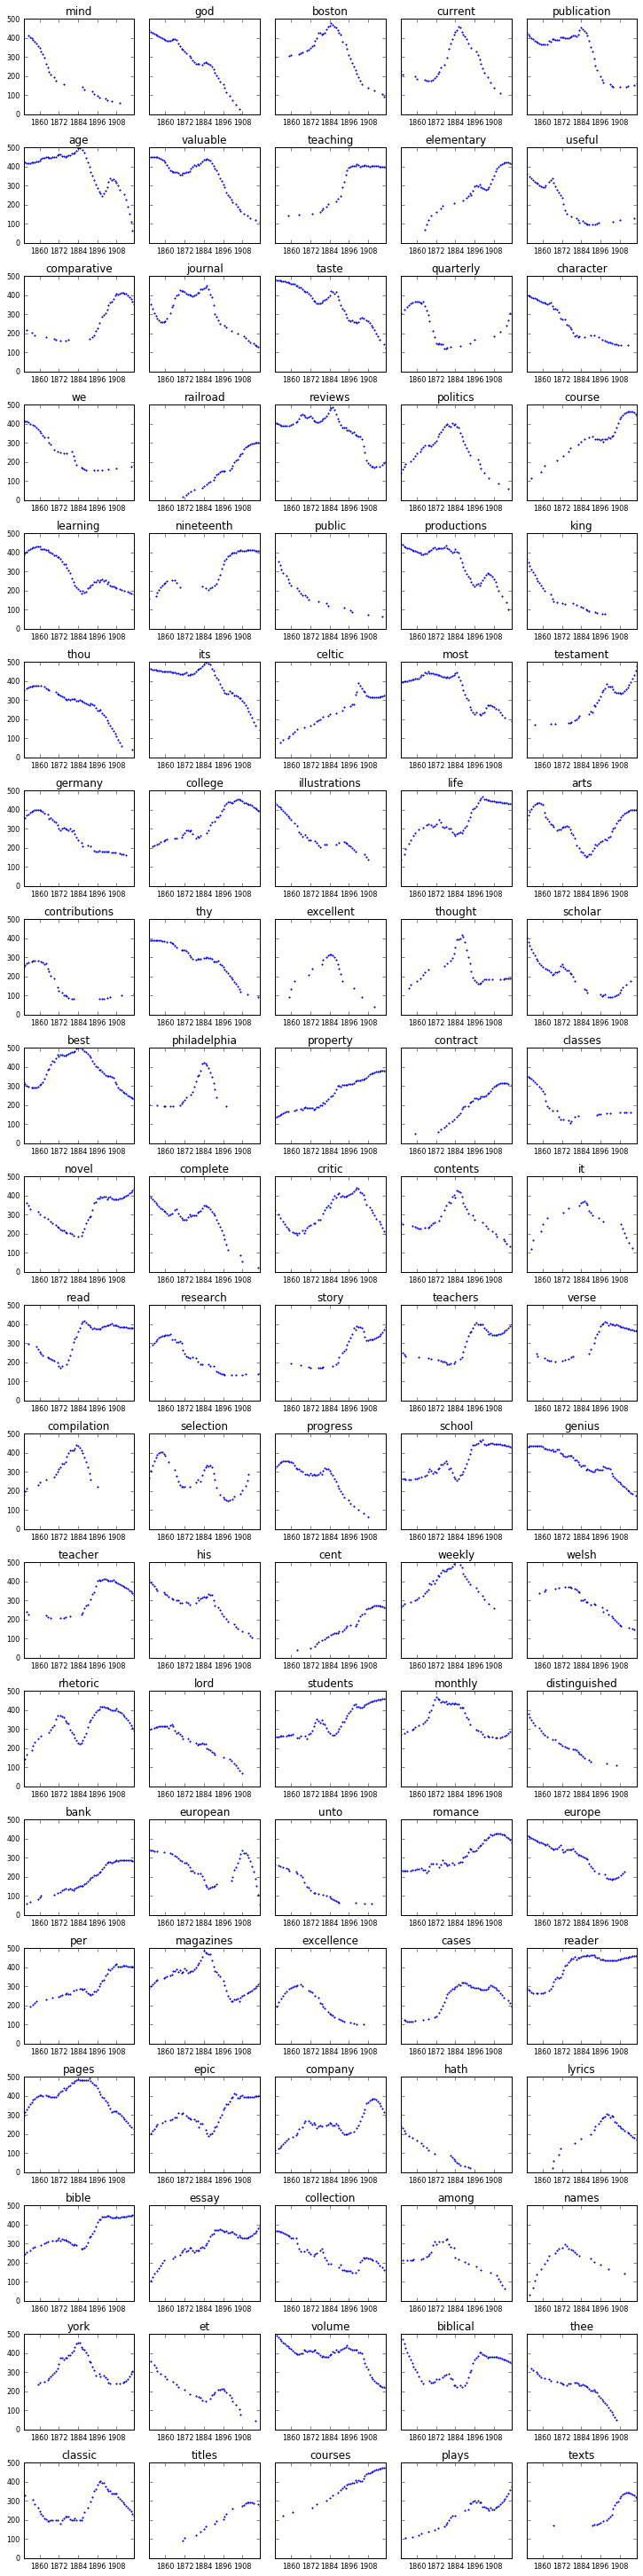

In [20]:
import numpy as np

from hol.topn_series import TopnSeries

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

years = range(1850, 1920)
depth = 500

topns = TopnSeries(years, depth, level1=5)

def print_query(_lambda, rows=20, cols=5, figsize=(10, 40)):
    
    result = topns.sort(_lambda)
    topn = list(result.items())[:100]
    
    y1 = list(years)[0]
    y2 = list(years)[-1]
    
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, row in enumerate(axarr):
        for j, ax in enumerate(row):
            
            t, (s, v) = topn[(i*5)+j]
            ax.set_title(t)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
            ax.tick_params(labelsize=8)
            ax.set_xlim(y1, y2)
            ax.set_ylim(0, depth)
            ax.plot(*zip(*s.items()), linestyle='none', marker=".", markersize=3)

def score(s):
    return np.var(list(s.values()))

print_query(score)

## Trending up

Words that show the largest overall increase in rank over time:

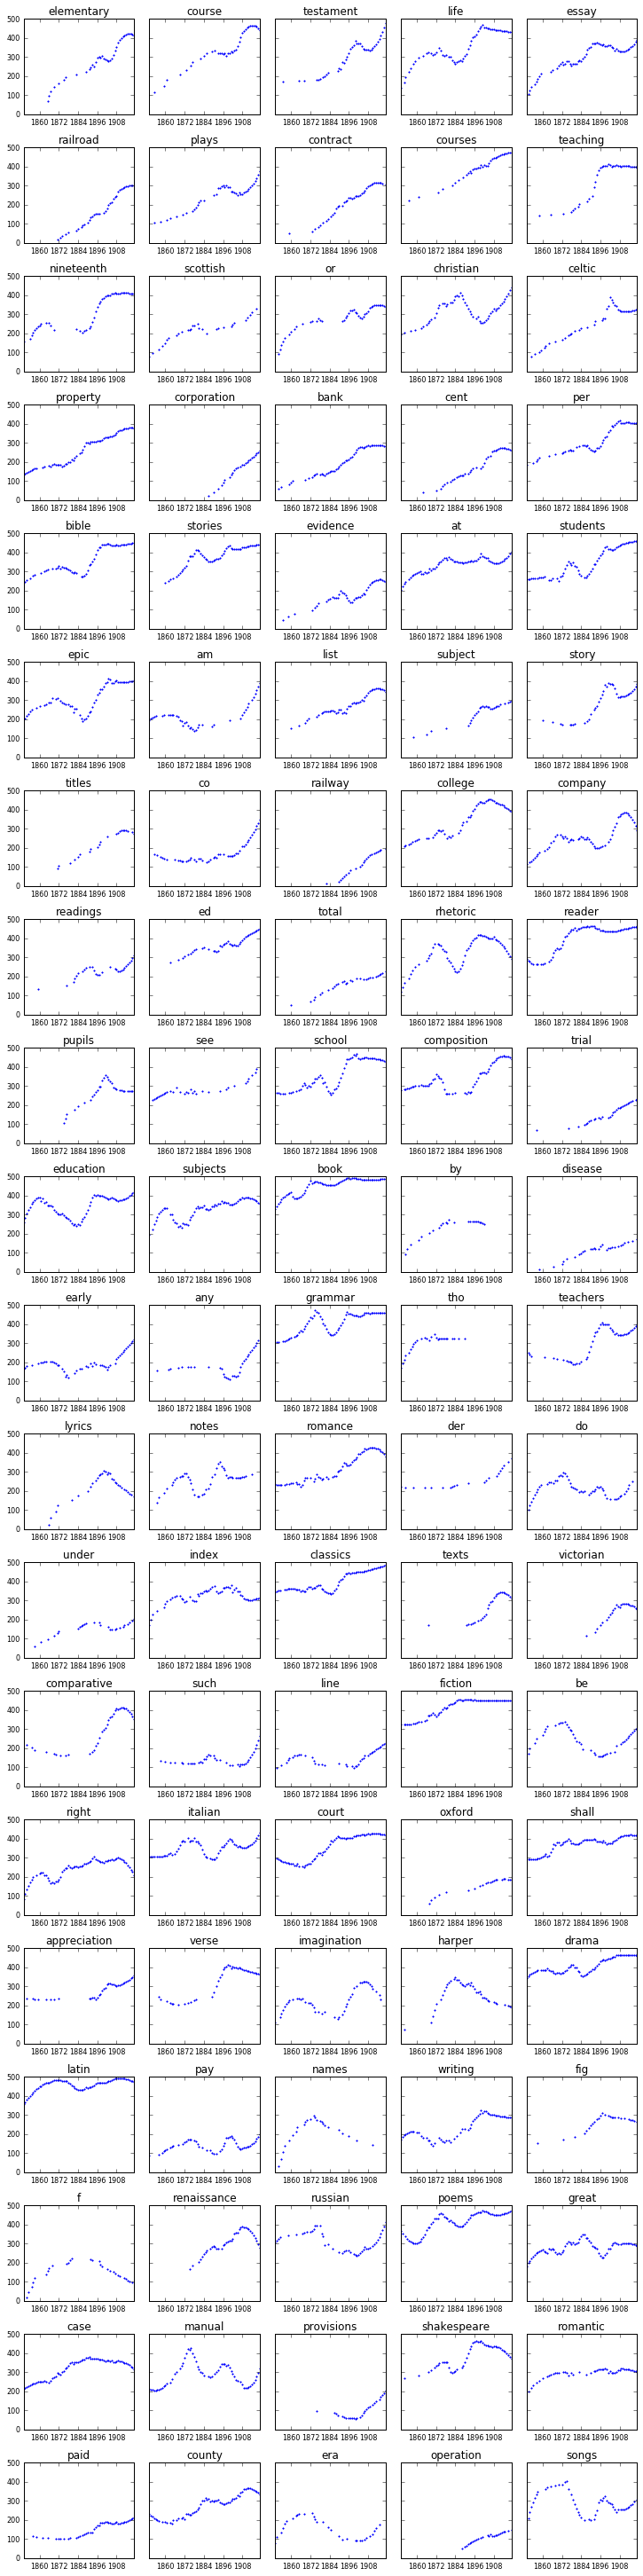

In [15]:
def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_query(score)

## Trending down

Words that show the largest overall decrease in rank over time:

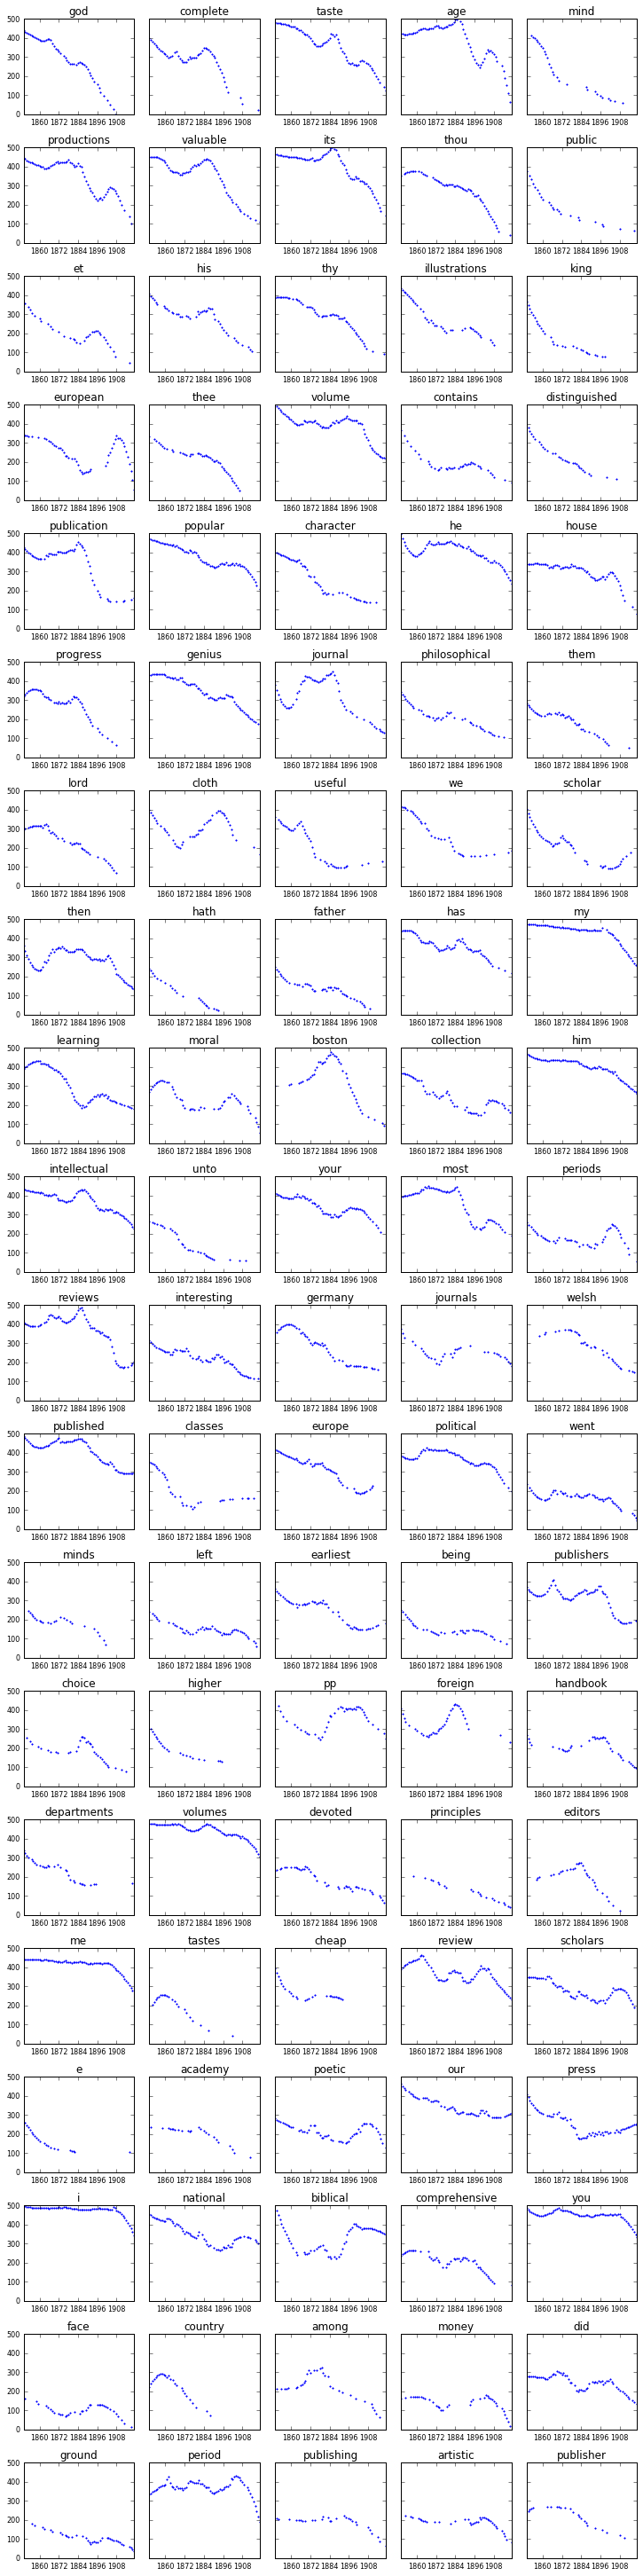

In [16]:
def score(s):
    y = list(s.values())
    return y[0] - y[-1]

print_query(score)

## Constant

Words that stay in the same place in the rankings over time:

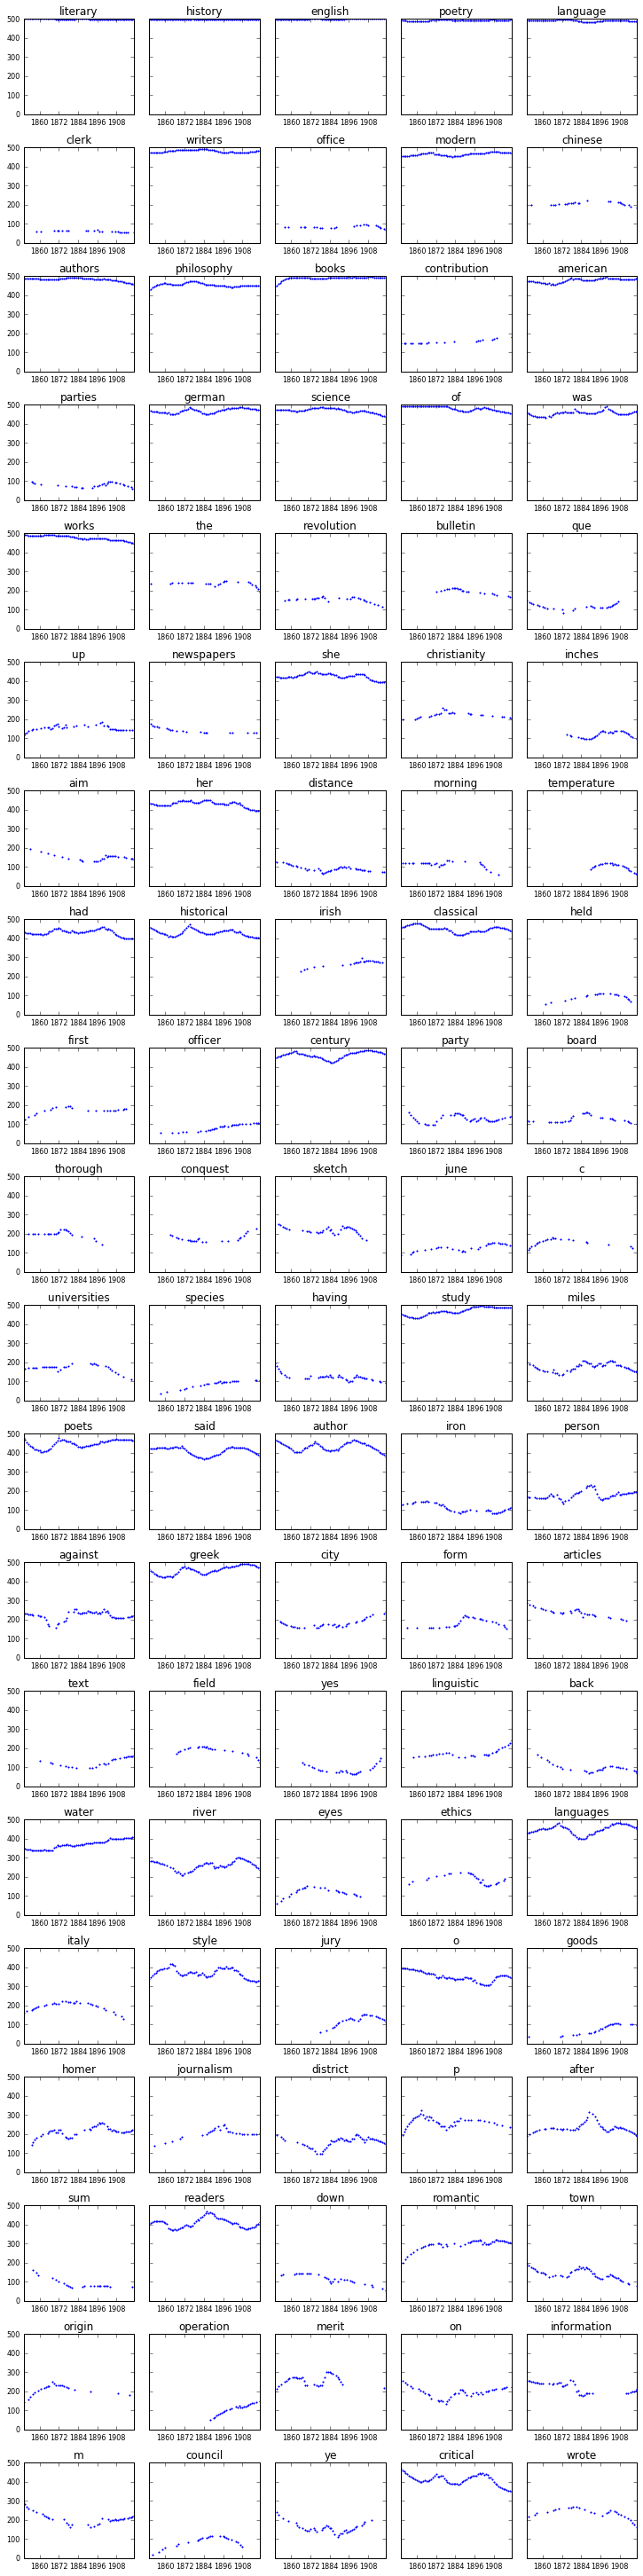

In [17]:
def score(s):
    return -np.var(list(s.values()))

print_query(score)